In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/content/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [61]:
import matplotlib.pyplot as plt
import seaborn as snr

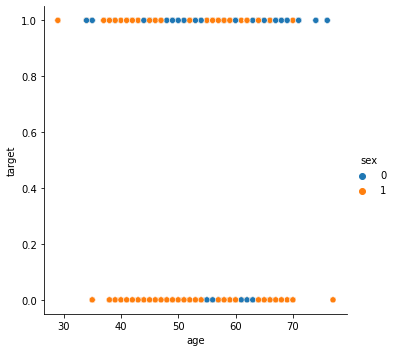

In [63]:
snr.relplot(x='age',y='target',hue='sex',data=data)

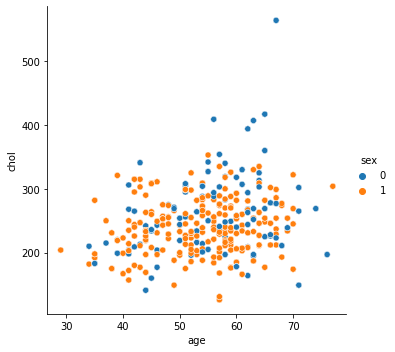

In [68]:
snr.relplot(x='age',y='chol',hue='sex',data=data)

In [4]:
X=data.drop(['target'],axis=1)
y=data['target']

In [5]:
X.shape #independent features 

(1025, 13)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape

(768, 13)

In [15]:
X_test.shape

(257, 13)

KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [9]:
predictions=knn.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [11]:
print(cm)

[[90 34]
 [34 99]]


In [12]:
print(ac)

0.7354085603112841


PCA

In [13]:
from sklearn.decomposition import PCA

In [52]:
pca=PCA(n_components=6) #n_components=principal_components
X_reduced_train=pd.DataFrame(pca.fit_transform(X_train))
X_reduced_test=pd.DataFrame(pca.fit_transform(X_test))

In [53]:
X_reduced_train.shape

(768, 6)

In [54]:
pca.n_components

6

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [56]:
knn.fit(X_reduced_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [57]:
predictions=knn.predict(X_reduced_test)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [59]:
print(cm)

[[ 78  46]
 [ 27 106]]


In [60]:
print(ac)

0.7159533073929961
